# Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])

#Data

In [2]:
titanic = pd.read_csv('/content/TitanicPreprocessed - TitanicPreprocessed.csv')

In [3]:
titanic.isnull().sum().sum()

0

In [4]:
titanic.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U', 'IsChild',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Ticket_A', 'Ticket_A4',
       'Ticket_A5', 'Ticket_AQ3', 'Ticket_AQ4', 'Ticket_AS', 'Ticket_C',
       'Ticket_CA', 'Ticket_CASOTON', 'Ticket_FC', 'Ticket_FCC', 'Ticket_Fa',
       'Ticket_LINE', 'Ticket_LP', 'Ticket_PC', 'Ticket_PP', 'Ticket_PPP',
       'Ticket_SC', 'Ticket_SCA3', 'Ticket_SCA4', 'Ticket_SCAH', 'Ticket_SCOW',
       'Ticket_SCPARIS', 'Ticket_SCParis', 'Ticket_SOC', 'Ticket_SOP',
       'Ticket_SOPP', 'Ticket_SOTONO2', 'Ticket_SOTONOQ', 'Ticket_SP',
       'Ticket_STONO', 'Ticket_STONO2', 'Ticket_STONOQ', 'Ticket_SWPP',
       'Ticket_WC', 'Ticket_WEP', 'Ticket_XXX', 'FamilySize', 'Singleton',
       'SmallFamily', 'Large

In [5]:
titanic.head(4)

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily,Survived
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,2,0,1,0,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,2,0,1,0,1
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,1,2,0,1,0,1


In [6]:
print(titanic.shape)
newcols = []
for col in titanic.columns:
  if (titanic[col] == titanic[col][0]).all() == False:
    newcols.append(col)

titanic = titanic[newcols]
print(titanic.shape)

(891, 69)
(891, 62)


In [7]:
titanic.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U', 'IsChild',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Ticket_A4', 'Ticket_A5',
       'Ticket_AS', 'Ticket_C', 'Ticket_CA', 'Ticket_CASOTON', 'Ticket_FC',
       'Ticket_FCC', 'Ticket_Fa', 'Ticket_LINE', 'Ticket_PC', 'Ticket_PP',
       'Ticket_PPP', 'Ticket_SC', 'Ticket_SCA4', 'Ticket_SCAH', 'Ticket_SCOW',
       'Ticket_SCPARIS', 'Ticket_SCParis', 'Ticket_SOC', 'Ticket_SOP',
       'Ticket_SOPP', 'Ticket_SOTONO2', 'Ticket_SOTONOQ', 'Ticket_SP',
       'Ticket_STONO', 'Ticket_STONO2', 'Ticket_SWPP', 'Ticket_WC',
       'Ticket_WEP', 'Ticket_XXX', 'FamilySize', 'SmallFamily', 'LargeFamily',
       'Survived'],
      dtype='object')

In [8]:
y = titanic['Survived'].to_numpy()
X = titanic[['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U', 'IsChild',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Ticket_A4', 'Ticket_A5',
       'Ticket_AS', 'Ticket_C', 'Ticket_CA', 'Ticket_CASOTON', 'Ticket_FC',
       'Ticket_FCC', 'Ticket_Fa', 'Ticket_LINE', 'Ticket_PC', 'Ticket_PP',
       'Ticket_PPP', 'Ticket_SC', 'Ticket_SCA4', 'Ticket_SCAH', 'Ticket_SCOW',
       'Ticket_SCPARIS', 'Ticket_SCParis', 'Ticket_SOC', 'Ticket_SOP',
       'Ticket_SOPP', 'Ticket_SOTONO2', 'Ticket_SOTONOQ', 'Ticket_SP',
       'Ticket_STONO', 'Ticket_STONO2', 'Ticket_SWPP', 'Ticket_WC',
       'Ticket_WEP', 'Ticket_XXX', 'FamilySize', 'SmallFamily', 'LargeFamily']].to_numpy()

In [9]:
fm = titanic['FamilySize']
tx = titanic['Ticket_XXX']
ct = titanic['Cabin_T']
cg = titanic['Cabin_G']
tw = titanic['Ticket_WEP']

In [10]:
corr = titanic.corr()
corr.style.background_gradient(cmap='coolwarm')

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,IsChild,Pclass_1,Pclass_2,Pclass_3,Ticket_A4,Ticket_A5,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,SmallFamily,LargeFamily,Survived
Sex,1.000000,0.100952,-0.114631,-0.245489,-0.182333,0.159934,-0.691548,0.867334,-0.552686,0.089228,-0.007483,-0.082853,-0.074115,0.119224,0.078271,-0.109689,-0.058649,-0.079248,-0.047003,-0.008202,-0.091031,0.024728,0.140391,-0.097669,-0.098013,-0.064746,0.137143,0.065645,0.083638,0.024728,0.023967,-0.006179,0.024728,0.024728,-0.070383,0.024728,0.049539,-0.073639,-0.038235,-0.014653,-0.045439,0.024728,-0.038235,0.024728,0.039034,-0.020746,0.032015,0.024728,0.002321,0.034990,0.078271,0.024728,0.086193,-0.082890,0.034990,-0.055216,0.002321,-0.032507,-0.200988,-0.260747,-0.102954,-0.543351
Age,0.100952,1.000000,-0.267801,-0.184627,0.125602,-0.391855,-0.303490,0.205098,0.203422,0.188543,0.068702,0.052410,-0.107742,0.021889,0.144459,0.106245,0.151943,0.145891,0.121897,-0.080269,-0.071651,0.039066,-0.279046,-0.554844,0.400953,0.021401,-0.362880,-0.029510,0.010448,-0.007935,0.001065,-0.081247,-0.002988,0.004433,0.037656,-0.007935,0.015077,0.176003,-0.053795,-0.000727,-0.030199,-0.007935,0.020556,0.009381,-0.031386,-0.038199,-0.042786,0.053909,0.016267,0.004523,-0.032266,-0.025252,-0.003229,-0.022531,0.039527,-0.021290,0.092048,-0.042151,-0.275269,-0.058852,-0.228804,-0.059594
SibSp,-0.114631,-0.267801,1.000000,0.414838,0.159651,0.349559,0.084945,-0.250489,0.059941,-0.024712,-0.008384,-0.059528,-0.026354,0.068734,-0.046266,-0.034538,0.029251,-0.017575,-0.036865,0.001706,-0.001402,-0.015907,0.040460,0.382516,-0.054582,-0.055932,0.092548,-0.019159,-0.046876,-0.015907,-0.035649,0.357512,-0.015907,0.014507,-0.008384,-0.015907,-0.031867,-0.046244,-0.010003,0.020528,-0.015907,-0.015907,0.007576,-0.015907,-0.007625,0.013831,0.035636,-0.015907,-0.027582,-0.022508,-0.062097,-0.015907,-0.046612,-0.001719,-0.022508,0.026776,0.007576,-0.080768,0.890712,0.213225,0.730691,-0.035322
Parch,-0.245489,-0.184627,0.414838,1.000000,0.216225,0.267344,0.102514,-0.333905,0.221318,-0.048211,-0.035583,-0.011069,-0.081228,0.060814,-0.040325,0.056498,0.030736,-0.019125,-0.016554,0.023694,0.072388,-0.015878,-0.036987,0.360462,-0.017633,-0.000734,0.015790,-0.042150,-0.055225,-0.015878,-0.035583,0.228435,-0.015878,-0.015878,0.039016,-0.015878,-0.031809,-0.049451,0.044618,-0.022467,-0.015878,-0.015878,-0.027532,-0.015878,0.005189,0.093228,-0.039002,-0.015878,-0.027532,-0.022467,-0.061983,-0.015878,-0.055345,-0.039002,-0.022467,0.134682,0.044618,-0.035762,0.783111,0.265863,0.631523,0.081629
Fare,-0.182333,0.125602,0.159651,0.216225,1.000000,0.010908,0.120829,-0.183766,0.105665,0.010357,0.015044,0.269335,-0.117216,-0.162184,0.019549,0.386297,0.364318,0.098878,0.053717,-0.033093,-0.025180,0.002224,-0.482075,0.003423,0.591711,-0.118557,-0.413333,-0.035304,-0.071882,-0.016302,-0.033399,-0.005363,-0.014649,0.013361,-0.015359,-0.016800,-0.043544,0.486256,-0.021012,-0.007835,-0.013636,-0.016302,-0.012023,-0.013451,-0.016863,0.002973,0.051055,-0.013282,-0.026551,-0.023569,-0.065010,-0.016229,-0.057589,-0.035872,-0.020728,-0.021149,0.041570,-0.173170,0.217138,0.205527,0.143636,0.257307
Title_Master,0.159934,-0.391855,0.349559,0.267344,0.010908,1.000000,-0.110602,-0.254903,-0.088394,-0.031131,-0.016287,-0.035225,0.010478,0.024264,0.013759,-0.026914,-0.035937,-0.042519,-0.012717,0.109227,-0.014559,-0.007267,0.027841,0.659073,-0.084700,0.009903,0.064918,-0.019292,-0.033683,-0.007267,-0.016287,0.159337,-0.007267,-0.007267,-0.016287,-0.007267,-0.014559,

In [11]:
titanic_copy = titanic
# Create correlation matrix
corr_matrix = titanic_copy.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] < 0.02)]

# Drop features 
#titanic1.drop(to_drop, axis=1, inplace=True)

In [12]:
titanic_copy.drop(to_drop, axis=1, inplace=True)
titanic_copy

,Sex,Age,SibSp,Parch,Fare,Title_Miss,Title_Mr,Title_Mrs,Cabin_B,Cabin_U
0,1,22.0,1,0,7.2500,0,1,0,0,1
1,0,38.0,1,0,71.2833,0,0,1,0,0
2,0,26.0,0,0,7.9250,1,0,0,0,1
3,0,35.0,1,0,53.1000,0,0,1,0,0
4,1,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,1,27.0,0,0,13.0000,0,0,0,0,1
887,0,19.0,0,0,30.0000,1,0,0,1,0
888,0,18.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,0,0,0


In [13]:
corr = titanic.corr()
corr.style.background_gradient(cmap='coolwarm')

,Sex,Age,SibSp,Parch,Fare,Title_Miss,Title_Mr,Title_Mrs,Cabin_B,Cabin_U
Sex,1.000000,0.100952,-0.114631,-0.245489,-0.182333,-0.691548,0.867334,-0.552686,-0.109689,0.140391
Age,0.100952,1.000000,-0.267801,-0.184627,0.125602,-0.303490,0.205098,0.203422,0.106245,-0.279046
SibSp,-0.114631,-0.267801,1.000000,0.414838,0.159651,0.084945,-0.250489,0.059941,-0.034538,0.040460
Parch,-0.245489,-0.184627,0.414838,1.000000,0.216225,0.102514,-0.333905,0.221318,0.056498,-0.036987
Fare,-0.182333,0.125602,0.159651,0.216225,1.000000,0.120829,-0.183766,0.105665,0.386297,-0.482075
Title_Miss,-0.691548,-0.303490,0.084945,0.102514,0.120829,1.000000,-0.599803,-0.207996,0.065664,-0.045347
Title_Mr,0.867334,0.205098,-0.250489,-0.333905,-0.183766,-0.599803,1.000000,-0.479363,-0.114673,0.137319
Title_Mrs,-0.552686,0.203422,0.059941,0.221318,0.105665,-0.207996,-0.479363,1.000000,0.061767,-0.121660
Cabin_B,-0.109689,0.106245,-0.034538,0.056498,0.386297,0.065664,-0.114673,0.061767,1.000000,-0.433053
Cabin_U,0.140391,-0.279046,0.040460,-0.036987,-0.482075,-0.045347,0.137319,-0.121660,-0.433053,1.000000


In [14]:
titanic['FamilySize'] = fm.to_numpy()
titanic['Ticket_XXX'] = tx.to_numpy()
titanic['Cabin_T'] = ct.to_numpy()
titanic['Cabin_G'] = cg.to_numpy()
#titanic['Ticket_WEP'] = tw.to_numpy()

In [15]:
titanic.head(3)

,Sex,Age,SibSp,Parch,Fare,Title_Miss,Title_Mr,Title_Mrs,Cabin_B,Cabin_U,FamilySize,Ticket_XXX,Cabin_T,Cabin_G
0,1,22.0,1,0,7.2500,0,1,0,0,1,2,0,0,0
1,0,38.0,1,0,71.2833,0,0,1,0,0,2,0,0,0
2,0,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0


In [16]:
continuous = ['Age', 'Fare', 'Parch', 'SibSp', 'FamilySize']

for var in continuous:
    titanic[var] = titanic[var].astype('float64')
    titanic[var] = titanic[var] - np.average(titanic[var]) / (np.std(titanic[var]))


titanic.head(5)

,Sex,Age,SibSp,Parch,Fare,Title_Miss,Title_Mr,Title_Mrs,Cabin_B,Cabin_U,FamilySize,Ticket_XXX,Cabin_T,Cabin_G
0,1,19.844483,0.525455,-0.473674,6.601578,0,1,0,0,1,0.81889,0,0,0
1,0,35.844483,0.525455,-0.473674,70.634878,0,0,1,0,0,0.81889,0,0,0
2,0,23.844483,-0.474545,-0.473674,7.276578,1,0,0,0,1,-0.18111,0,0,0
3,0,32.844483,0.525455,-0.473674,52.451578,0,0,1,0,0,0.81889,1,0,0
4,1,32.844483,-0.474545,-0.473674,7.401578,0,1,0,0,1,-0.18111,1,0,0


In [17]:
titanic['Survived'] = y

In [18]:
# Select ratio
ratio = 0.75
 
total_rows = titanic.shape[0]
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = titanic[0:train_size]
test = titanic[train_size:]

In [19]:
X_train, y_train = train[train.columns.difference(['Survived'])], train['Survived'].to_numpy() #change this to numpy
X_test, y_test = test[test.columns.difference(['Survived'])], test['Survived'].to_numpy()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [20]:
type(y_test)

numpy.ndarray

## Shallow ANN or Multi-Layer Perceptron

In [21]:
def linear(H):
  return H

def ReLU(H):
  return H*(H>0)

def sigmoid(H):
  return 1/(1+np.exp(-H))

def softmax(H):
  eH = np.exp(H)
  return eH/eH.sum(axis=1, keepdims=True)

def one_hot_encode(y):
  N = len(y)
  K = len(set(y))
  Y = np.zeros((N,K))

  for i in range(N):
    Y[i,y[i]]=1

  return Y

def accuracy(y, y_hat):
  return np.mean(y==y_hat)

def cross_entropy(Y, P_hat):
  return -np.sum(Y*np.log(P_hat))

def R2(y, y_hat):
  return 1-np.sum((y-y_hat)**2)/np.sum((y-y.mean())**2)

In [22]:
class Shallow_ANN():

  def fit(self, X, y, neurons = 10, eta = 1e-3, epochs =1e3, show_curve= False):
    epochs = int(epochs)
    Y = one_hot_encode(y)

    N,D = X.shape
    K = Y.shape[1]
    # Weights and Biases Initialization
    self.W = {l: np.random.randn(M[0],M[1])for l,M in enumerate(zip([D,neurons],[neurons,K]),1)}
    self.B = {l: np.random.randn(M) for l, M in enumerate([neurons, K],1)}
    #define activations
    self.a = {1:np.tanh, 2:sigmoid}

    J = np.zeros(epochs)

    #GradientDescent
    for epoch in range(epochs):
      self.__forward__(X)
      J[epoch]= cross_entropy(Y, self.Z[2])

      #Weights and Biases Update Rules
      #For Layer 2 (Output)
      self.W[2] -= eta*(1/N)*self.Z[1].T@(self.Z[2]-Y)
      self.B[2] -= eta*(1/N)*(self.Z[2]-Y).sum(axis=0)
      #For Layer 1
      self.W[1] -= eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2))
      self.B[1] -= eta*(1/N)*((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis=0)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$") 
      plt.title("Training Curve")
      plt.show()

  def __forward__(self, X):
    self.Z={0:X}

    for l in sorted(self.W.keys()):
      self.Z[l]= self.a[l](self.Z[l-1]@self.W[l]+self.B[l])

  def predict(self,X):
    self.__forward__(X)
    return self.Z[2].argmax(axis=1)

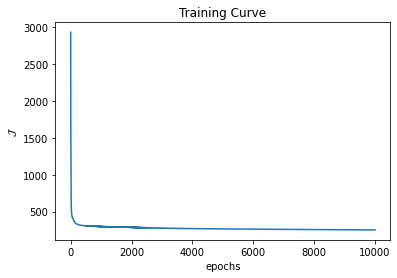

Training Accuracy: 0.8341


In [23]:
my_ann = Shallow_ANN()

my_ann.fit(X_train,y_train, neurons= 70, eta = 1e-2, epochs=1e4, show_curve=True)
y_hat = my_ann.predict(X_test)

print (f"Training Accuracy: {accuracy(y_test,y_hat):0.4f}")

In [31]:
nur = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 130, 140, 150, 300]
for n in nur:
  my_ann = Shallow_ANN()

  my_ann.fit(X_train,y_train, neurons=n, eta = 1e-2, epochs=1e4, show_curve=False)
  y_hat = my_ann.predict(X_test)

  print (n, f"Training Accuracy: {accuracy(y_test,y_hat):0.4f}")

10 Training Accuracy: 0.7040
20 Training Accuracy: 0.8117
30 Training Accuracy: 0.7668
40 Training Accuracy: 0.7534
50 Training Accuracy: 0.7758
60 Training Accuracy: 0.7713
70 Training Accuracy: 0.8117
80 Training Accuracy: 0.8072
90 Training Accuracy: 0.7982
100 Training Accuracy: 0.8072
120 Training Accuracy: 0.8072
130 Training Accuracy: 0.8161
140 Training Accuracy: 0.7982
150 Training Accuracy: 0.8117
300 Training Accuracy: 0.7982


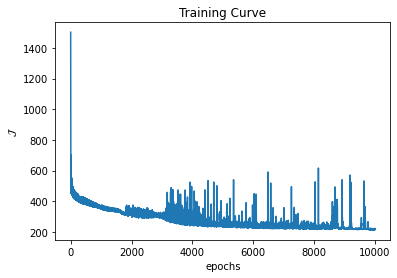

0.1 Training Accuracy: 0.7892


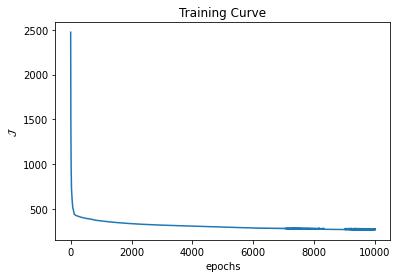

0.01 Training Accuracy: 0.7937


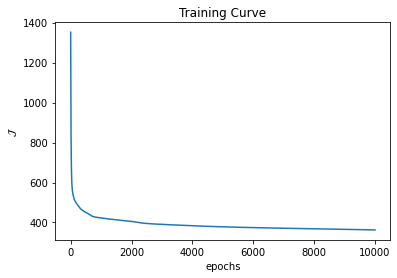

0.001 Training Accuracy: 0.7623


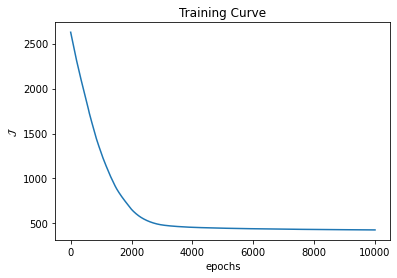

0.0001 Training Accuracy: 0.7265


KeyboardInterrupt: ignored

In [29]:
et = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]
for n in et:
  my_ann = Shallow_ANN()

  my_ann.fit(X_train,y_train, neurons=70, eta = n, epochs=1e4, show_curve=True)
  y_hat = my_ann.predict(X_test)

  print (n, f"Training Accuracy: {accuracy(y_test,y_hat):0.4f}")
# 70 1e-2 1e4 81.17

# Functions

In [99]:
def get_survival(sex, age, sibsp, parch, fare, miss, mr, mrs, b, u, famsize, xxx, t, g):
  #titanic.loc['893'] = (sex, age, sibsp, parch, fare, miss, mr, mrs, b, u, famsize, xxx, t, g)

  continuous = ['Age', 'Fare', 'Parch', 'SibSp', 'FamilySize']

  titanic['Age'] = titanic['Age'].astype('float64')
  age = age - np.average(titanic['Age']) / (np.std(titanic['Age']))
  titanic['Fare'] = titanic['Fare'].astype('float64')
  fare = fare - np.average(titanic['Fare']) / (np.std(titanic['Fare']))
  titanic['Parch'] = titanic['Parch'].astype('float64')
  parch = parch - np.average(titanic['Parch']) / (np.std(titanic['Parch']))
  titanic['SibSp'] = titanic['SibSp'].astype('float64')
  sibsp = sibsp - np.average(titanic['SibSp']) / (np.std(titanic['SibSp']))
  titanic['FamilySize'] = titanic['FamilySize'].astype('float64')
  famsize = famsize - np.average(titanic['FamilySize']) / (np.std(titanic['FamilySize']))
  





  X_tester = [[age, sex, mr, mrs, miss, famsize,sibsp, parch, b, fare, u, xxx, t, g]]
  X_tester = np.array(X_tester)
  Y = my_ann.predict(X_tester)
  #print(X_tester)
  return Y[0]

In [87]:
titanic.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Cabin_B', 'Cabin_U', 'FamilySize', 'Ticket_XXX',
       'Cabin_T', 'Cabin_G', 'Survived'],
      dtype='object')

#Demo

Inputs:
age, sex, mr, mrs, miss, famsize, sibsp, parch, Cabin_B, fare, Cabin_U, Ticket_XXX, Cabin_T, Cabin_G

In [109]:
#Live Demo
get_survival(24,0,0,0,1,2,0,0,1,0,0,1,0,0)

0